# Offense vs Defense in the NBA: the ultimate debate. 

### *Is being perfect at both really necesary to win it all?*

![title](images/harden.jpeg)

*Pictured Above*: James Harden, one of the most prolific players of his era is well on his way to become one of the best offensive players to ever play the game. His deffense however left many fans questioning whether he and his offense-heavy team could ever pull off the championship during his time in Houston. 

### Intro

We’ve all heard it before: Offenses win games, defenses win championships. At least in popular sports like Baseball, playing defense looks completely different from playing offense. In American Football, there are literally two different sets of people playing 2 completely different sports. Each unit requires a completely different set of skills and players are not expected to play both disciplines. Compare this with sports like Football(Soccer)and Basketball, where players are expected to play both positions. In a matter of seconds, the game switches from offense to defense and back to offense, demanding that players remain ready to guard a player. In this context, an extremely talented shooter might be a liability in defense. This has been a struggle since the beginning of the game, because coaches know that any player that steps into the court will need to step up his defense.

So really, how important is a team’s defense compared to its offense? Can a team compensate a bad defense with killer offense? This might seem like a trivial question, but its implications are real. Teams have limited resources (salary) as well as a limited number of roster spots, so GM's (General Managers) and Head Coaches are faced with decisions. 


### About the project
There has been a recent revolution in major sports: that of incorporating data into not only the way they play the game, but the way they train, eat and sleep. This has led to "rosters with more skilled, more well-rounded players that are better rested, and increased the profitability of the NBA."(randerson112358) NBA teams are investing huge amounts of resources into data-based decision making and that is only going to get bigger. This project will try to give some insight into one of the biggest dichotomies in modern sports, and will hopefully lead to useful insights about the game and the players that shape it. 

#### Who will be directly affected by the creation of this project?

The implications of effectively solving a problem like this start at a player level, but it goes as far as organization level. To give an example, if projects like this one consistently find that offensive heavy teams can consistently win and get into the playoffs without having a good defense, organizations might be inclined to focus their attention into scouting and developing offensively skilled players. The inverse can also be true, where teams might realize that investing the time and effort into finding good defensive players is “easier” than offensively skilled players and projects like this show that a good offense is practically indistinguishable from a good defense when we see team success. 

Teams can start adjusting scouting location, training camps, rosters, lineups and even plays during the game if they realize that one of the two is heavily underrated in team success. The main point here is that organizations are trying build teams that deliver *results* and we want to learn more about what a prototypically good team looks like and how well we can distinguish one by looking at offense and defense. 

#### What business problem(s) will this Data Science project solve for the organization?

A small to medium market team might be halfway through the season wondering if they have what it takes to have a winning Season. Winning Seasons provide teams the opportunity to climb the standings and make it to the playoffs, so it is important for a team to know whether the roster could be able to end up winning more games or not as it is. If a team decides that its current roster doesn’t have what it takes for the rest of the season, it could trade players and look for better opportunities so it is important to understand what makes a good team win and how a good team looks. 

#### What problems are inside the scope of this project?

We’re not going to be able to solve a problem as big as this with one project. This project is meant to provide insight about how performance translates into results. Understanding what a good team looks like in both defense and offense will lead to very important problems that we’ll have to deal with. 

#### What problems are outside the scope of this project?

Answering questions like, “should teams be making more midrange or paint shots?” Are out of the scope of the project. Even though we have information about the shooting locations and effectiveness from every area, we won’t delve into models with different shooting locations. We want to feed the different shooting shooting performances by zone to our models, and if we do get insights about them that would be really good, but that is not the point or the objective of this project. 

#### What is the expected timeline for this project? Are there hard deadlines (e.g. "must be live before holiday season shopping") or is this an ongoing project?

Understanding what a good “playoff” team looks like with a model can be tested with the current NBA season. As of March 28, 2021 we don’t know how teams will end their season. The trade deadline is already past so teams don’t really have an opportunity to change their teams now, but it will be really interesting to test out the models on an ongoing season. 




![title](images/klay.jpeg)

## In comes the data

Let’s Try to answer this question with NBA stats. The NBA has a way of accessing every single STAT you could think of in their webpage . You can have a lot of fun without writing a single line of code just by looking at the data in their page: https://www.nba.com/stats/ For this project I will be using two different sets of data: One that measures teams’ offensive performance and one that measures teams’ defensive performances. Let´s take a look at what these 2 different data sets look like.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

team_shooting = pd.read_csv('data/team.csv') #Offensive Dataset
opponent_shooting = pd.read_csv('data/opposing.csv')#Defensive Dataset

### Team Shooting by Zone (Offense)
The first dataset tracks teams’ offensive performances in other words, how good teams shot the ball. Each row represents a different team and the columns contain information about ***that team’s*** shooting during ***1 NBA complete season***. The data is divided by shooting zones, so we have information on how well teams shot in the left corner 3, or in the midrange for example. The screenshot of our dataset shown below, shows how well the Atlanta Hawks and 6 other teams shot the ball in the 2020 season. In the NBA’s page we can then toggle the 2019 season and see the offensive performance for that season. I went ahead and concatenated every season spanning back to 1997 into a single data frame, so at the end of the day each row is a different historical team (2010 Rockets is a different team from the 2012 rockets) and how well that team shot the ball that season. You can think of each row as a report card for the complete season.

In [2]:
team_shooting.head()

,TEAM,RA FGM,RA FGA,RA FG%,PAINT FGM,PAINT FGA,PAINT FG%,MIDRANGE FGM,MIDRANGE FGA,MIDRANGE FG%,...,RIGHT CORNER FG%,CORNER 3 FGM,CORNER 3 FGA,CORNER 3 FG%,ATB 3 FGM,ATB FGA,ATB FG%,YEAR,SEASON WIN PCT,PLAYOFFS
0,Atlanta Hawks,746.0,1206.0,61.9,313.0,756.0,41.4,174.0,399.0,43.6,...,33.3,130.0,332.0,39.2,436.0,1220.0,35.7,2021.0,0.511,1
1,Boston Celtics,710.0,1076.0,66.0,337.0,792.0,42.6,243.0,581.0,41.8,...,37.3,121.0,300.0,40.3,461.0,1225.0,37.6,2021.0,0.489,1
2,Brooklyn Nets,815.0,1220.0,66.8,317.0,686.0,46.2,200.0,438.0,45.7,...,37.3,153.0,385.0,39.7,508.0,1289.0,39.4,2021.0,0.674,1
3,Charlotte Hornets,765.0,1279.0,59.8,252.0,599.0,42.1,151.0,378.0,39.9,...,44.0,151.0,353.0,42.8,467.0,1242.0,37.6,2021.0,0.523,1
4,Chicago Bulls,795.0,1227.0,64.8,279.0,639.0,43.7,204.0,489.0,41.7,...,41.3,173.0,389.0,44.5,378.0,1070.0,35.3,2021.0,0.442,0


### NBA Glossary:
- **FGA**: Field Goal Attempted. The number of shots attempted. 
- **FGM**: Field Goal Made. The number of succesful shots. 
- **FG%**: Field Goal Percentage. The percentage of shots made.(FGM divided by FGA multiplied by 100)
- **Season Win PCT**: The number of games won divided by the number of games played. (A complete NBA Regular season has 82 games)
- **Playoffs**: Elimination tournament annually held after the National Basketball Association (NBA)'s regular season to determine the league's champion. In our data set, that is represented by a 1 if the team played in the playoffs or 0 if it didn´t.

Here are the basic shooting zones:

- **Corner 3:** The small area on the left and right side of the court near the baseline. The 3-point line is a few inches closer to the basket in the corners.
- **In The Paint:** These are shots taken inside the key, the rectangular box close to the basket that measures 15 feet out to the free throw line and 16 feet wide.
- **Restricted Area:** The four-foot area directly surrounding the basket, marked by a semicircle in the paint.
- **Mid-range:** Any shot that comes outside the paint but inside the 3-point line.
- **Above the Break 3:** Any 3-pointer that is not taken from the corners.

![title](images/zones.png)

### Opponent Shooting by Zone (Defense)
Here comes the cool part about the project. Instead of using the classic defensive performance parameters like steals and blocks, I found the same exact shooting data as the one above, only instead of containing numbers about the team’s own shooting, it contains their opponents shooting numbers. In other words, if I go to a random row, say the 2018 Boston Celtics, the row contains information about how well opposing teams shot the ball that season when playing against that Celtics team. And it’s exactly the same format as our offensive team performance information, so we get to see shot zones too. With this format we can notice defensive trends that we can’t see with the traditional info. Maybe the 2005 lakers were extremely good at stopping teams near the basket (their opponents’ paint numbers are hideous) but were really bad at guarding the three pointer(their opponents shot the triple better against them than the league average)


In [3]:
opponent_shooting.head()

,TEAM,RA FGM,RA FGA,RA FG%,PAINT FGM,PAINT FGA,PAINT FG%,MIDRANGE FGM,MIDRANGE FGA,MIDRANGE FG%,...,RIGHT CORNER FG%,CORNER 3 FGM,CORNER 3 FGA,CORNER 3 FG%,ATB 3 FGM,ATB FGA,ATB FG%,YEAR,SEASON WIN PCT,PLAYOFFS
0,Atlanta Hawks,801,1288,62.2,274,689,39.8,218,490,44.5,...,37.2,137,353,38.8,392,1157,33.9,2021,0.511,1
1,Boston Celtics,684,1049,65.2,338,768,44.0,210,498,42.2,...,38.7,143,365,39.2,432,1186,36.4,2021,0.489,1
2,Brooklyn Nets,765,1195,64.0,367,845,43.4,226,535,42.2,...,32.6,144,407,35.4,458,1226,37.4,2021,0.674,1
3,Charlotte Hornets,840,1280,65.6,209,481,43.5,126,336,37.5,...,38.2,221,549,40.3,433,1221,35.5,2021,0.523,1
4,Chicago Bulls,786,1251,62.8,299,652,45.9,238,531,44.8,...,42.6,125,296,42.2,361,1100,32.8,2021,0.442,0


### The idea

I will build two different classification models, one will only get offensive performance data and the other will only get defensive performance data. The target parameter, or the thing they’re trying to predict is whether a team is a winning team or not. A winning team is one that won more games than it lost in the season (Win pct > 0.5).

So just to recap, the idea is to feed teams’ shooting performance information as well as their winning record for the season (did they win a lot of games?) to the first model. Once it’s trained, feed it a random, mysterious team. The model will then try to answer the question: did this unknown team win a lot of games that season based on how they shot the ball?

Then, take all of the opponent shooting information and feed it to another model. The “defensive” model will have to classify whether the team had a winning or losing season based on the how well their opponents shot the ball when playing against them throughout that season. So this second model will have to classify whether this team won many games or not based only on how teams shot against them. The model won’t have any information about that random team’s shooting performance.

Then I will test both models to see how well they do with data they’ve never seen before. I will give both models information about a mystery season for a mystery team and they will have to tell me whether they think it was a winning season for the team or not. The models’ accuracy will tell us about the implications of good offense or defense.


In [4]:
team_shooting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 25 columns):
TEAM                742 non-null object
RA FGM              741 non-null float64
RA FGA              741 non-null float64
RA FG%              741 non-null float64
PAINT FGM           741 non-null float64
PAINT FGA           741 non-null float64
PAINT FG%           741 non-null float64
MIDRANGE FGM        741 non-null float64
MIDRANGE FGA        741 non-null float64
MIDRANGE FG%        741 non-null float64
LEFT CORNER FGM     741 non-null float64
LEFT CORNER FGA     741 non-null float64
LEFT CORNER FG%     741 non-null float64
RIGHT CORNER FGM    741 non-null float64
RIGHT CORNER FGA    741 non-null float64
RIGHT CORNER FG%    741 non-null float64
CORNER 3 FGM        741 non-null float64
CORNER 3 FGA        741 non-null float64
CORNER 3 FG%        741 non-null float64
ATB 3 FGM           741 non-null float64
ATB FGA             741 non-null float64
ATB FG%             741 non-null fl

In [5]:
opponent_shooting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 25 columns):
TEAM                742 non-null object
RA FGM              742 non-null int64
RA FGA              742 non-null int64
RA FG%              742 non-null float64
PAINT FGM           742 non-null int64
PAINT FGA           742 non-null int64
PAINT FG%           742 non-null float64
MIDRANGE FGM        742 non-null int64
MIDRANGE FGA        742 non-null int64
MIDRANGE FG%        742 non-null float64
LEFT CORNER FGM     742 non-null int64
LEFT CORNER FGA     742 non-null int64
LEFT CORNER FG%     742 non-null float64
RIGHT CORNER FGM    742 non-null int64
RIGHT CORNER FGA    742 non-null int64
RIGHT CORNER FG%    742 non-null float64
CORNER 3 FGM        742 non-null int64
CORNER 3 FGA        742 non-null int64
CORNER 3 FG%        742 non-null float64
ATB 3 FGM           742 non-null int64
ATB FGA             742 non-null int64
ATB FG%             742 non-null float64
YEAR                74

### Classify Winners and Losers

In [6]:
team_shooting['Winning Season'] = team_shooting['SEASON WIN PCT'].map(lambda x: 0 if x < 0.5 else 1)

In [7]:
team_shooting.head()

,TEAM,RA FGM,RA FGA,RA FG%,PAINT FGM,PAINT FGA,PAINT FG%,MIDRANGE FGM,MIDRANGE FGA,MIDRANGE FG%,...,CORNER 3 FGM,CORNER 3 FGA,CORNER 3 FG%,ATB 3 FGM,ATB FGA,ATB FG%,YEAR,SEASON WIN PCT,PLAYOFFS,Winning Season
0,Atlanta Hawks,746.0,1206.0,61.9,313.0,756.0,41.4,174.0,399.0,43.6,...,130.0,332.0,39.2,436.0,1220.0,35.7,2021.0,0.511,1,1
1,Boston Celtics,710.0,1076.0,66.0,337.0,792.0,42.6,243.0,581.0,41.8,...,121.0,300.0,40.3,461.0,1225.0,37.6,2021.0,0.489,1,0
2,Brooklyn Nets,815.0,1220.0,66.8,317.0,686.0,46.2,200.0,438.0,45.7,...,153.0,385.0,39.7,508.0,1289.0,39.4,2021.0,0.674,1,1
3,Charlotte Hornets,765.0,1279.0,59.8,252.0,599.0,42.1,151.0,378.0,39.9,...,151.0,353.0,42.8,467.0,1242.0,37.6,2021.0,0.523,1,1
4,Chicago Bulls,795.0,1227.0,64.8,279.0,639.0,43.7,204.0,489.0,41.7,...,173.0,389.0,44.5,378.0,1070.0,35.3,2021.0,0.442,0,0


# Restricted Area vs Season Wins

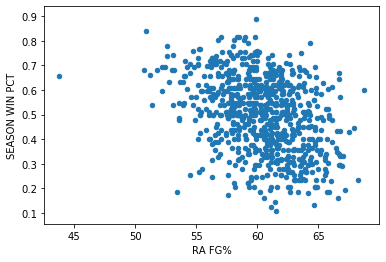

In [8]:
opponent_shooting.plot.scatter(x='RA FG%', y='SEASON WIN PCT')

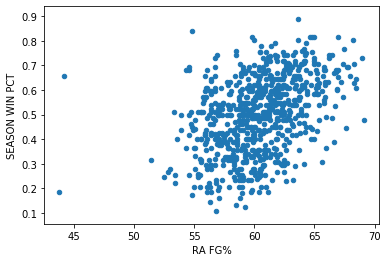

In [9]:
team_shooting.plot.scatter(x='RA FG%', y='SEASON WIN PCT')

# Shooting Throughout the years
the midrange is dead

In [10]:
def attempts_pct(df,year):
    specific = df.loc[df['YEAR'] == year]
    specific_attempts = specific[['RA FGA','PAINT FGA','MIDRANGE FGA', 'CORNER 3 FGA', 'ATB FGA']]
    specific_totals = specific_attempts.sum(axis = 0, skipna = True)
    return specific_totals
def plotbar(df,year1,year2):
    specific_totals1 = attempts_pct(df,year1)
    specific_totals2 = attempts_pct(df,year2)
    
    specific_totals1 = specific_totals1.map(lambda x: (x/specific_totals1.sum()*100))
    specific_totals2 = specific_totals2.map(lambda x: (x/specific_totals2.sum()*100))
   
    compare_df = pd.DataFrame({'{}'.format(year1): specific_totals1,'{}'.format(year2): specific_totals2})
    compare_df.plot.bar(title = 'Distribution of Attempted Shots by Zone in the {} and {} NBA Seasons'.format(year1-1,year2)
                       ,figsize=(12,5))
    plt.xlabel('ZONE')
    plt.ylabel('Percentage of Shots Attempted')
    plt.show()
    print(compare_df)

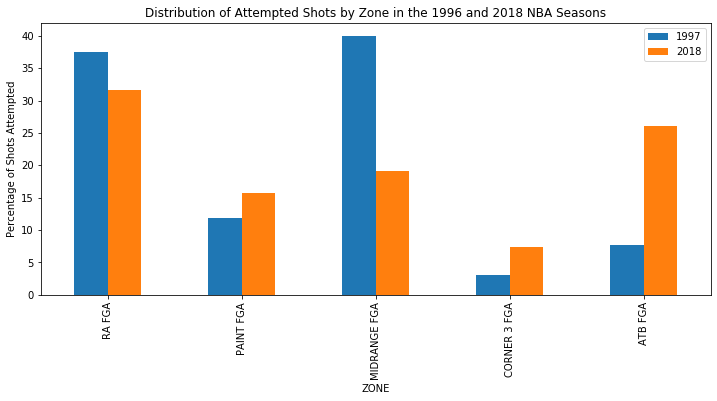

                   1997       2018
RA FGA        37.464832  31.666848
PAINT FGA     11.877993  15.741324
MIDRANGE FGA  39.969848  19.100022
CORNER 3 FGA   3.056024   7.391220
ATB FGA        7.631302  26.100586


In [11]:
plotbar(team_shooting,1997,2018)

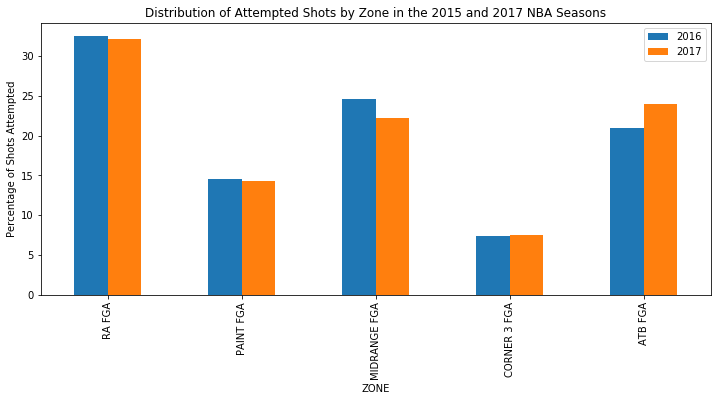

                   2016       2017
RA FGA        32.510014  32.129590
PAINT FGA     14.569083  14.240080
MIDRANGE FGA  24.647993  22.238934
CORNER 3 FGA   7.338530   7.482691
ATB FGA       20.934380  23.908705


In [12]:
plotbar(team_shooting,2016,2017)

In [13]:
def made(df,year):
    specific = df.loc[df['YEAR'] == year]
    specific_attempts = specific[['RA FGM','PAINT FGM','MIDRANGE FGM', 'CORNER 3 FGM', 'ATB 3 FGM']]
    specific_totals = specific_attempts.sum(axis = 0, skipna = True)
    return specific_totals
def plotbar2(df,year1,year2):
    attempts_totals1 = attempts_pct(df,year1)
    attempts_totals2 = attempts_pct(df,year2)
    
    made_totals1 = made(df,year1)
    made_totals2 = made(df,year2)
    
    pct1 = made_totals1.reset_index().drop('index',axis = 1).divide(attempts_totals1.reset_index().drop('index',axis = 1))
    pct2 = made_totals2.reset_index().drop('index',axis = 1).divide(attempts_totals2.reset_index().drop('index',axis = 1))
    
    index = ['RA','PAINT','MIDRANGE', 'CORNER 3', 'ATB 3']
    
    
   
    compare_df = pd.DataFrame({'{}'.format(year1): pct1[0],'{}'.format(year2): pct2[0],'ZONE': index})
    #compare_df.set_index(index)
    compare_df = compare_df.set_index('ZONE')
    print(compare_df)
    compare_df.plot.bar(title = 'FG% by Zone in the {} and {} NBA Seasons'.format(year1-1,year2)
                       ,figsize=(12,5))
    plt.xlabel('ZONE')
    plt.ylabel('FG%')
    #plt.show()

### FG% Throughout the Years

              1997      2017
ZONE                        
RA        0.547544  0.610991
PAINT     0.433724  0.417564
MIDRANGE  0.402518  0.402512
CORNER 3  0.398298  0.387212
ATB 3     0.334933  0.351474


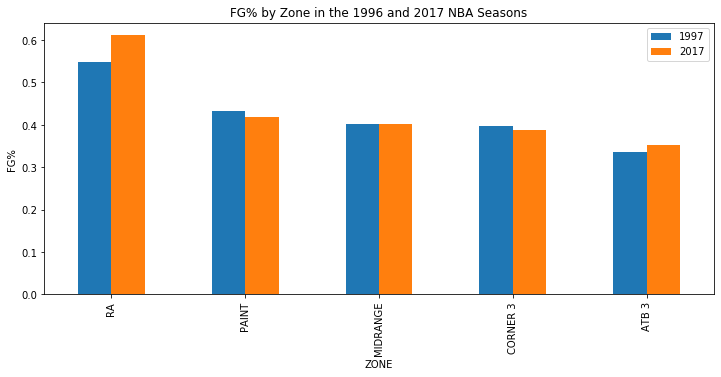

In [14]:
plotbar2(team_shooting,1997,2017)

# Rockets' Shooting

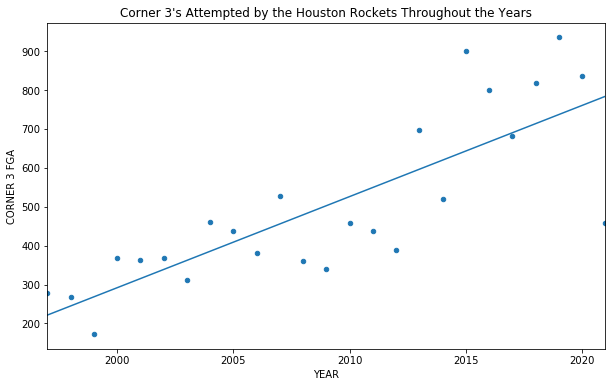

In [16]:
import numpy as np
rockets_shooting = team_shooting.loc[team_shooting['TEAM'] == 'Houston Rockets']
rockets_shooting = rockets_shooting.iloc[::-1]

z = np.polyfit(x=rockets_shooting['YEAR'], y=rockets_shooting['CORNER 3 FGA'], deg=1)
p = np.poly1d(z)
rockets_shooting['trendline'] = p(rockets_shooting['YEAR'])

ax = rockets_shooting.plot.scatter(x ='YEAR', y='CORNER 3 FGA', figsize=(10,6))
rockets_shooting.set_index('YEAR', inplace=True)
rockets_shooting.trendline.sort_index(ascending=False).plot(ax=ax)
plt.title('Corner 3\'s Attempted by the Houston Rockets Throughout the Years')
plt.show()


### TEAM WINS THROUGHOUT THE YEARS

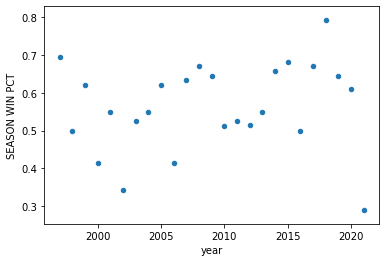

In [24]:
rockets_shooting.plot.scatter(x='year', y='SEASON WIN PCT')


In [22]:
rockets_shooting['year'] = rockets_shooting.index